In [24]:
import pandas as pd
import numpy as np

import contractions
import emoji
import string 
import re

import matplotlib.pyplot as plt
import seaborn as sn

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /Users/bryson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bryson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bryson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Remove emojis 
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_stopwords(reviews):
    STOPWORDS = stopwords.words('english')
    STOPWORDS.remove('not')
    STOPWORDS.remove('is')
    STOPWORDS.remove('but')
    if STOPWORDS is None:
        STOPWORDS = set(stopwords.words('english'))
    return ' '.join([word for word in reviews.split() if word not in STOPWORDS])

def remove_extra_whitespace(reviews):
    return " ".join(reviews.split())

def get_wordnet_pos(text):
    # Map POS tag to first character lemmatize() accepts
    tags = nltk.pos_tag(text)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    tags = [tag_dict.get(tag[1][0],  wordnet.NOUN) for tag in tags]
    return tags

def lemmaSentence(reviews):
    lemmatizer = WordNetLemmatizer()
    lemma_text = ''
    tok_text = word_tokenize(reviews)
    tags = get_wordnet_pos(tok_text)
    for i in range(len(tok_text)):
        lemma_text = lemma_text + ' ' + lemmatizer.lemmatize(tok_text[i], tags[i])
    return lemma_text[1:]

def lower_case(review):
    
    return review.lower()

# change contraction words such sa I'm = I am, shouldn't = should not
def change_contractions(review):
    
    expanded_words = [contractions.fix(word) for word in review.split()]

    expanded_review = ' '.join(expanded_words)
    return expanded_review

# Remove Punctuations
def remove_punctuations(review):
    
    new_review = review.translate(str.maketrans('', '', string.punctuation))
    return new_review

# Remove numbers
def remove_numbers(review):
    
    mapping = str.maketrans('', '', string.digits)
    new_review = review.translate(mapping)
    
    return new_review

In [26]:

def clean_text(data):

    data['concat_review'] = data['concat_review'].apply(lower_case)
    data['concat_review'] = data['concat_review'].apply(change_contractions)
    data['concat_review'] = data['concat_review'].apply(remove_emojis)
    data['concat_review'] = data['concat_review'].apply(remove_punctuations)
    data['concat_review'] = data['concat_review'].apply(remove_numbers)
    data['concat_review'] = data['concat_review'].apply(remove_stopwords)
    data['concat_review'] = data['concat_review'].apply(remove_extra_whitespace)
    data['concat_review'] = data['concat_review'].apply(lemmaSentence)
    
    return data

## Pre-processing of Dataset

In [27]:
# Pre-processing of dataset
train_data = pd.read_csv('train_test_dataset/train_df_imbalanced.csv')
clean_train_df = clean_text(train_data)
clean_train_df

Unnamed: 0 productAsin  ratingScore  \
0            9406  B08NLXR9V5            4   
1            5701   670062510            5   
2           13621  1542046599            1   
3            5021   399226907            5   
4           21354  125030170X            2   
...           ...         ...          ...   
20956       12474  1542046599            5   
20957       22518  125030170X            1   
20958        5670   670062510            4   
20959         891  B01IW9TM5O            5   
20960       16454  1984806734            5   

                                             reviewTitle  \
0                                             Girl Alone   
1      A great book for young people.  It has a great...   
2                                 More gripes than hypes   
3                       Add this book to your collection   
4                                             Just okay.   
...                                                  ...   
20956                 Great read; couldn‚Äôt put it down   
20957                                        Used books?   
20958  My 7th graders not only love this book but the...   
20959  One of my favorite books ever - read almost al...   
20960                                   Such a good book   

                      reviewReaction  \
0      One person found this helpful   
1                                NaN   
2      One person found this helpful   
3                                NaN   
4                                NaN   
...                              ...   
20956                            NaN   
20957                            NaN   
20958                            NaN   
20959  One person found this helpful   
20960                            NaN   

                                       reviewDescription  isVerified  \
0      My first Blake Pierce book was enjoyable, fast...        True   
1      My favorite book when I was young.  I read it ...        True   
2      This is the first book I‚Äôve read by this aut...        True   
3      Cute and educational book to teach counting an...        True   
4      This is one of those books you can read in a c...       False   
...                                                  ...         ...   
20956  The first chapter reads from an odd point of v...        True   
20957  They are purchased as new and I received the o...        True   
20958  My 7th graders not only love this book but the...        True   
20959  One of my favorite books ever - read almost al...        True   
20960  This book is so good, I‚Äôm more than half way...        True   

                  category         languages  \
0                  mystery  Language.ENGLISH   
1                 children  Language.ENGLISH   
2                  mystery  Language.ENGLISH   
3                 children  Language.ENGLISH   
4                 children  Language.ENGLISH   
...                    ...               ...   
20956              mystery  Language.ENGLISH   
20957             children  Language.ENGLISH   
20958             children  Language.ENGLISH   
20959  humor_entertainment  Language.ENGLISH   
20960              romance  Language.ENGLISH   

                                           concat_review  polarity  
0      girl alone first blake pierce book enjoyable f...         1  
1      great book young people great story favorite b...         1  
2      gripe hype be first book i‚äôve read author th...        -1  
3      add book collection cute educational book teac...         1  
4            okay be one book read couple day story okay         0  
...                                                  ...       ...  
20956  great read couldn‚äôt put first chapter read o...         1  
20957  use book purchase new receive original replace...        -1  
20958  th grader not love book but hard bound be must...         1  
20959  one favorite book ever read almost one favorit...         1  
20960  good book book be good i‚äôm half way might 

 1    13246
-1     7518
 0      197
Name: polarity, dtype: int64


Text(0, 0.5, 'Frequency')

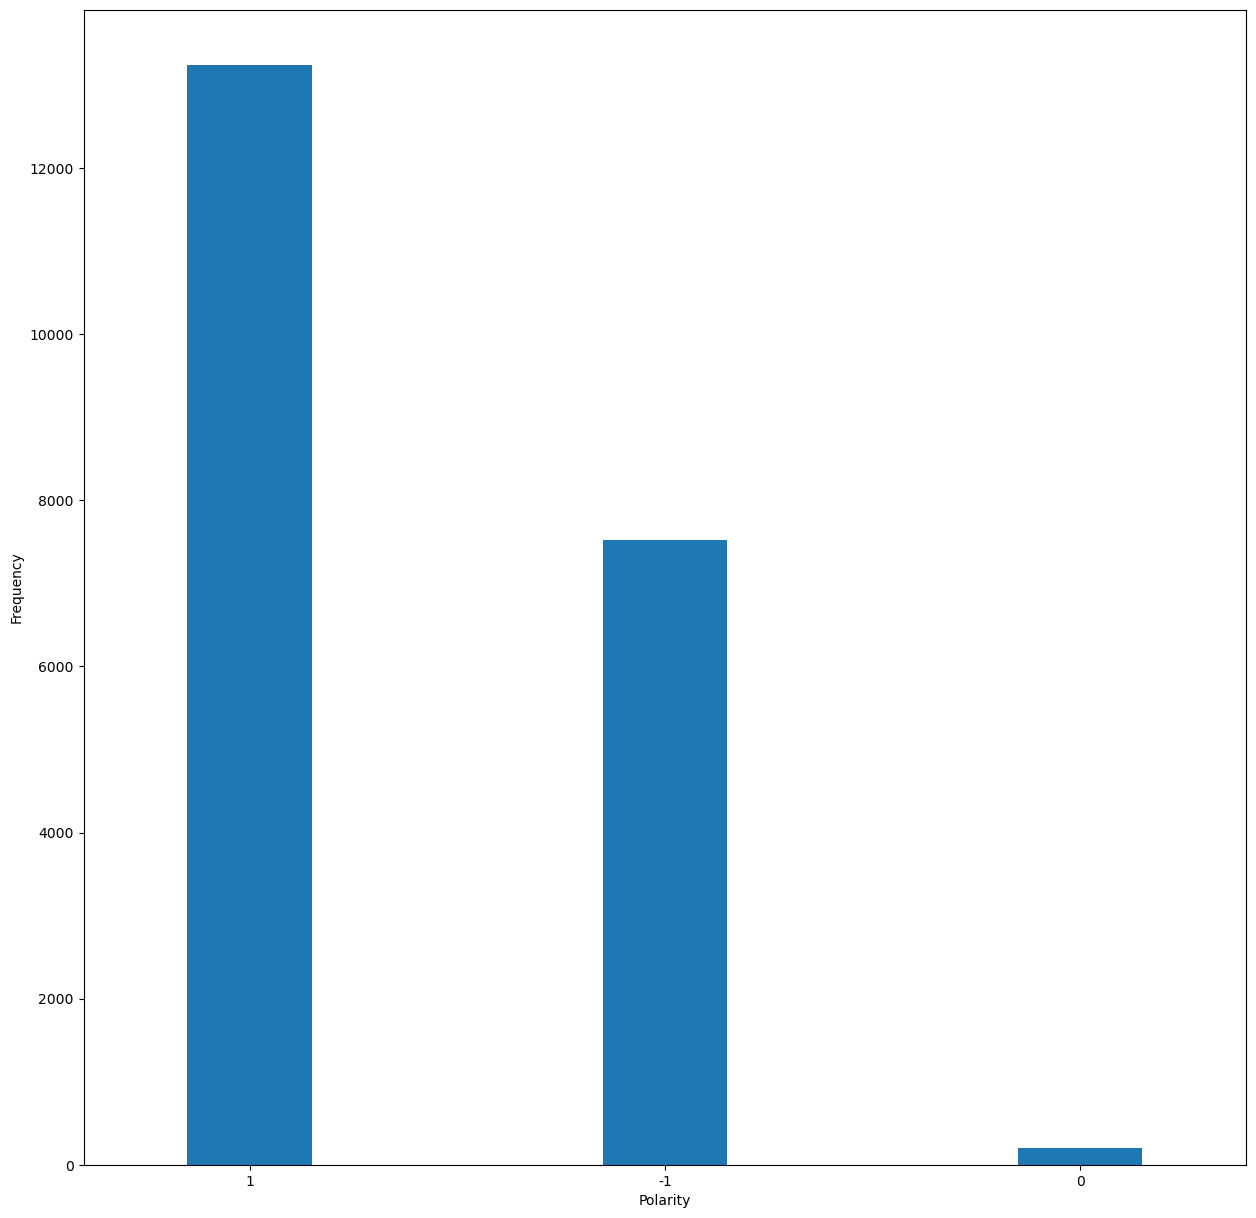

In [28]:
# Check if the dataset is balanced
print(clean_train_df["polarity"].value_counts())

clean_train_df['polarity'].value_counts(sort=False).plot.bar(figsize=(15,15), width = 0.3, rot=0)
plt.xlabel('Polarity')
plt.ylabel('Frequency')

## Balancing Train Dataset

In [29]:
# Drop the excess positive reviews randomly
differences = clean_train_df["polarity"].value_counts()[1]-clean_train_df["polarity"].value_counts()[-1]
train_df_balanced = clean_train_df.drop(clean_train_df[clean_train_df["polarity"] == 1].sample(differences,random_state=42).index)
train_df_balanced

Unnamed: 0 productAsin  ratingScore  \
1            5701   670062510            5   
2           13621  1542046599            1   
3            5021   399226907            5   
4           21354  125030170X            2   
5           23286    63215381            1   
...           ...         ...          ...   
20951        4658   385376715            5   
20953        6580  9387779262            4   
20954       23094  194563183X            1   
20957       22518  125030170X            1   
20958        5670   670062510            4   

                                             reviewTitle  \
1      A great book for young people.  It has a great...   
2                                 More gripes than hypes   
3                       Add this book to your collection   
4                                             Just okay.   
5                        The paperback‚Äôs quality sucks   
...                                                  ...   
20951                                      Awesome book!   
20953                                               Good   
20954                                            X rated   
20957                                        Used books?   
20958  My 7th graders not only love this book but the...   

                      reviewReaction  \
1                                NaN   
2      One person found this helpful   
3                                NaN   
4                                NaN   
5                                  1   
...                              ...   
20951                            NaN   
20953                            NaN   
20954                            NaN   
20957                            NaN   
20958                            NaN   

                                       reviewDescription  isVerified  \
1      My favorite book when I was young.  I read it ...        True   
2      This is the first book I‚Äôve read by this aut...        True   
3      Cute and educational book to teach counting an...        True   
4      This is one of those books you can read in a c...       False   
5      I hate this paperback. Terrible quality! The p...        True   
...                                                  ...         ...   
20951  I love this book. I purchased it for a baby sh...        True   
20953  Books were smaller than I expected...but still...        True   
20954  I wish I had known how pornographic this book ...        True   
20957  They are purchased as new and I received the o...        True   
20958  My 7th graders not only love this book but the...        True   

       category         languages  \
1      children  Language.ENGLISH   
2       mystery  Language.ENGLISH   
3      children  Language.ENGLISH   
4      children  Language.ENGLISH   
5      children  Language.ENGLISH   
...         ...               ...   
20951  children  Language.ENGLISH   
20953  children  Language.ENGLISH   
20954  children  Language.ENGLISH   
20957  children  Language.ENGLISH   
20958  children  Language.ENGLISH   

                                           concat_review  polarity  
1      great book young people great story favorite b...         1  
2      gripe hype be first book i‚äôve read author th...        -1  
3      add book collection cute educational book teac...         1  
4            okay be one book read couple day story okay         0  
5      paperback‚äôs quality suck hate paperback terr...        -1  
...                                                  ...       ...  
20951  awesome book love book purchase baby shower gi...         1  
20953  good book small expectedbut still goodperfect ...         1  
20954  x rat wish know pornographic book buy buyer be...        -1  
20957  use book purchase new receive original replace...        -1  
20958  th grader not love book but hard bound be must...         1  

[15233 rows x 11 columns]

 1    7518
-1    7518
 0     197
Name: polarity, dtype: int64


Text(0, 0.5, 'Frequency')

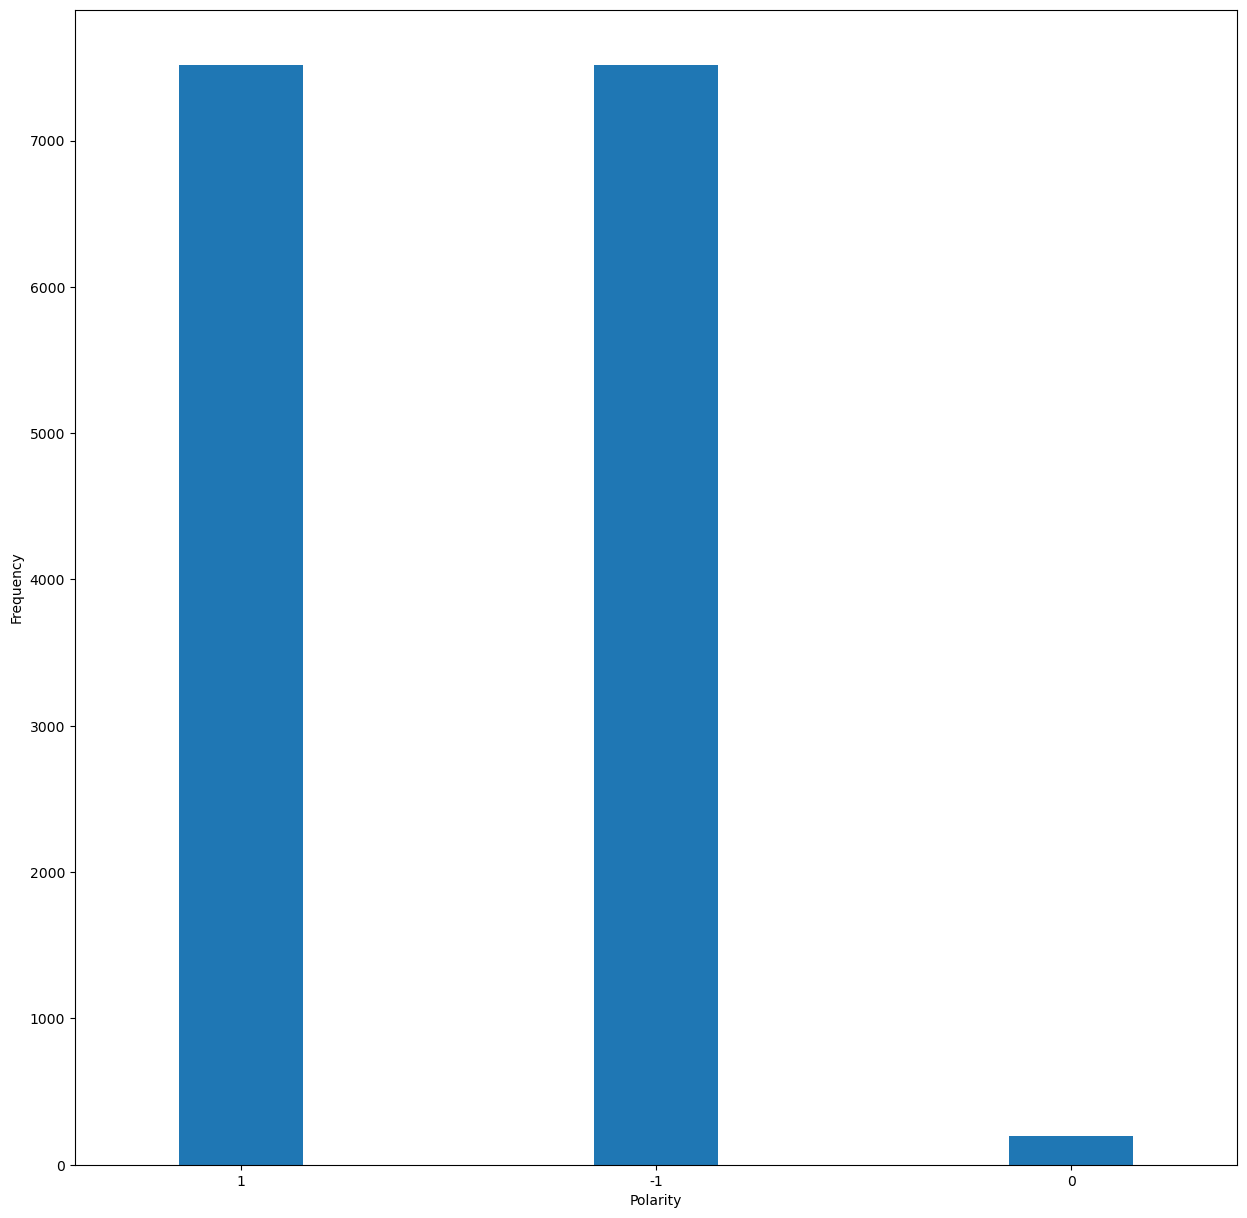

In [30]:
# Check if the dataset is balanced
print(train_df_balanced["polarity"].value_counts())

train_df_balanced['polarity'].value_counts(sort=False).plot.bar(figsize=(15,15), width = 0.3, rot=0)
plt.xlabel('Polarity')
plt.ylabel('Frequency')

## Visualization of Dataset Aspect

In [31]:
def get_wordcloud(text, color='viridis'):
  # Create a WordCloud object
  
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', colormap=color)
  # Generate a word cloud
  return wordcloud.generate(text)

In [32]:
print(train_df_balanced['category'].value_counts())

children               6343
humor_entertainment    3880
mystery                3207
romance                1803
Name: category, dtype: int64


### Product Reviews of Book Category 'Children'

(-0.5, 399.5, 199.5, -0.5)

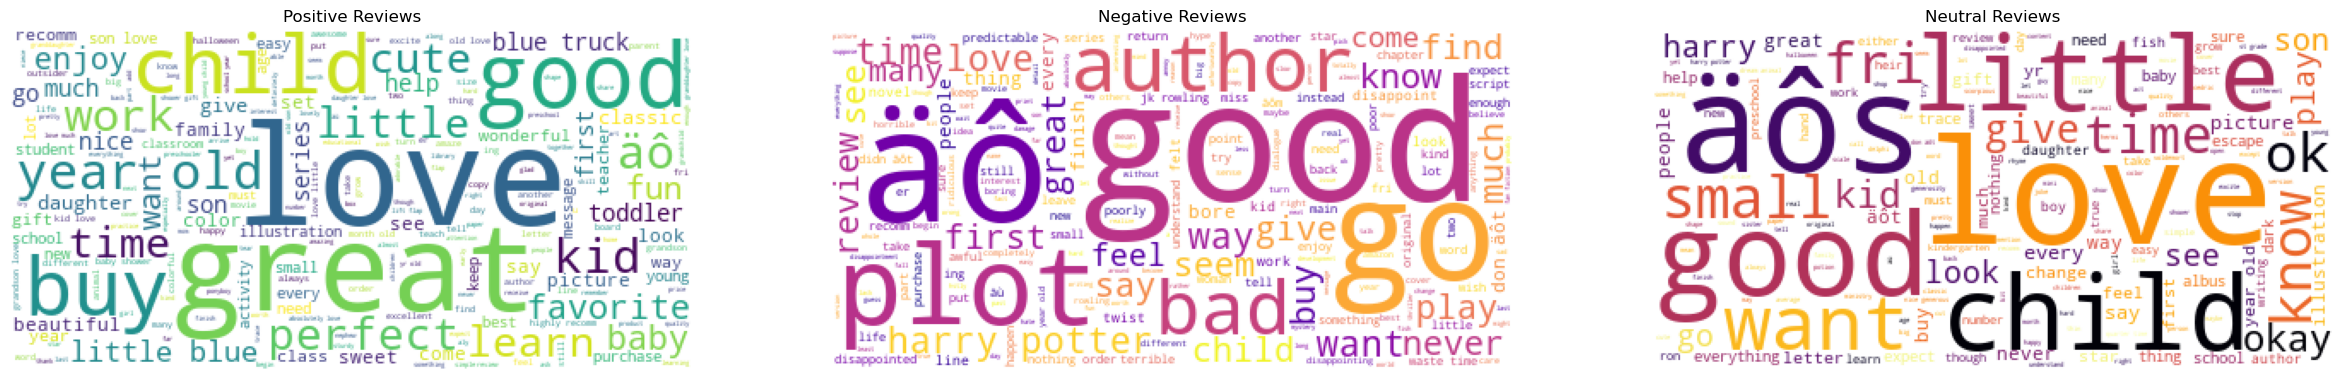

In [37]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==1][train_df_balanced['category']=='children'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==-1][train_df_balanced['category']=='children'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==0][train_df_balanced['category']=='children'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### Product Reviews of Book Category 'Humor & Entertainment'

(-0.5, 399.5, 199.5, -0.5)

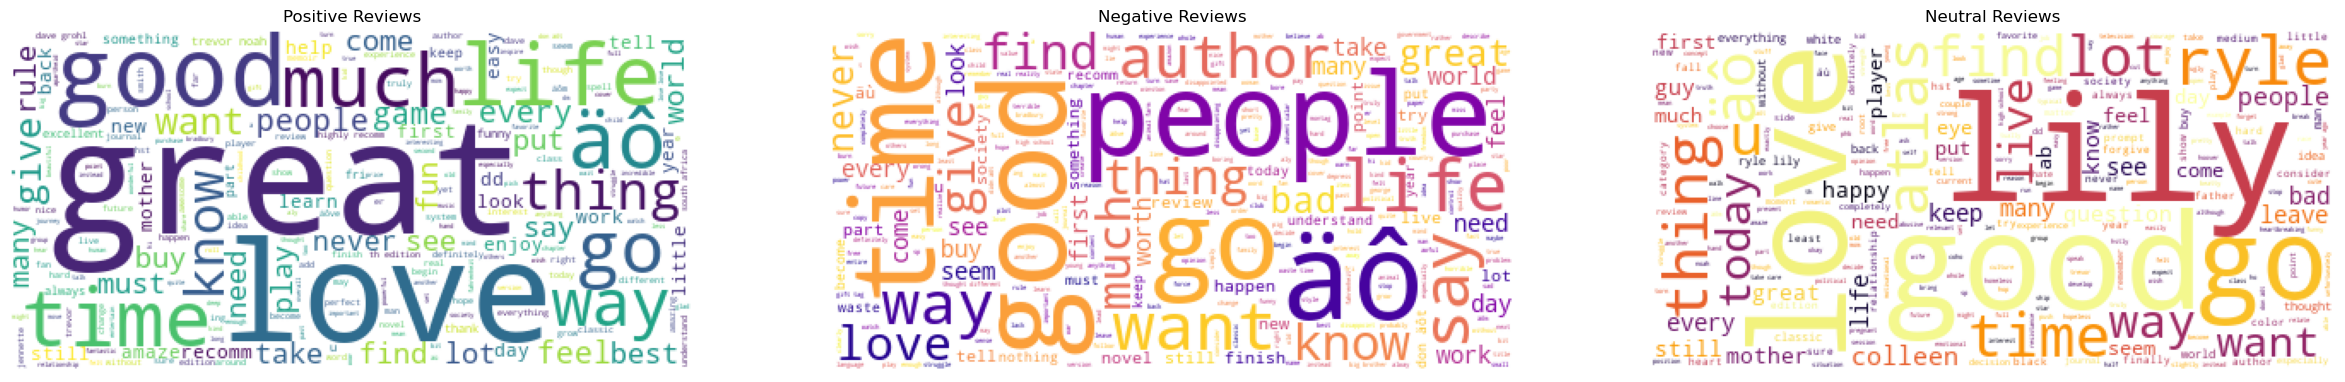

In [38]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==1][train_df_balanced['category']=='humor_entertainment'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==-1][train_df_balanced['category']=='humor_entertainment'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==0][train_df_balanced['category']=='humor_entertainment'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### Product Reviews of Book Category 'Mystery'

(-0.5, 399.5, 199.5, -0.5)

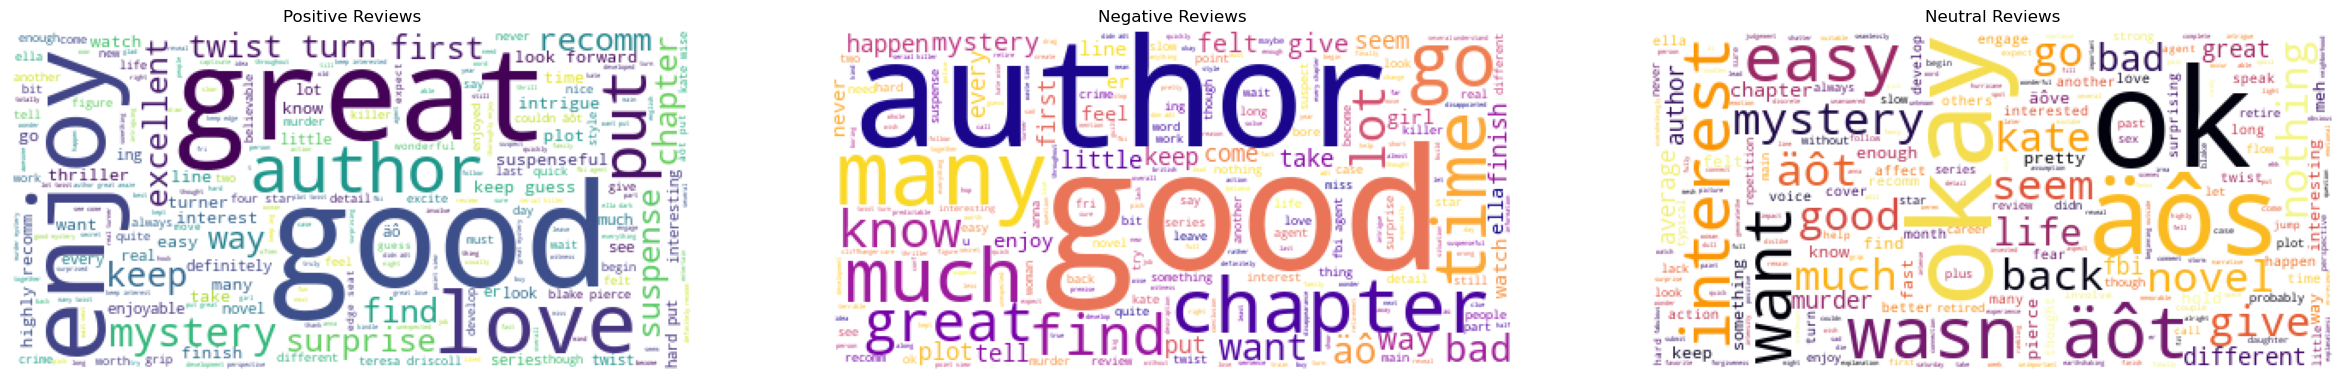

In [39]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==1][train_df_balanced['category']=='mystery'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==-1][train_df_balanced['category']=='mystery'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==0][train_df_balanced['category']=='mystery'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### Product Reviews of Book Category 'Romance'

(-0.5, 399.5, 199.5, -0.5)

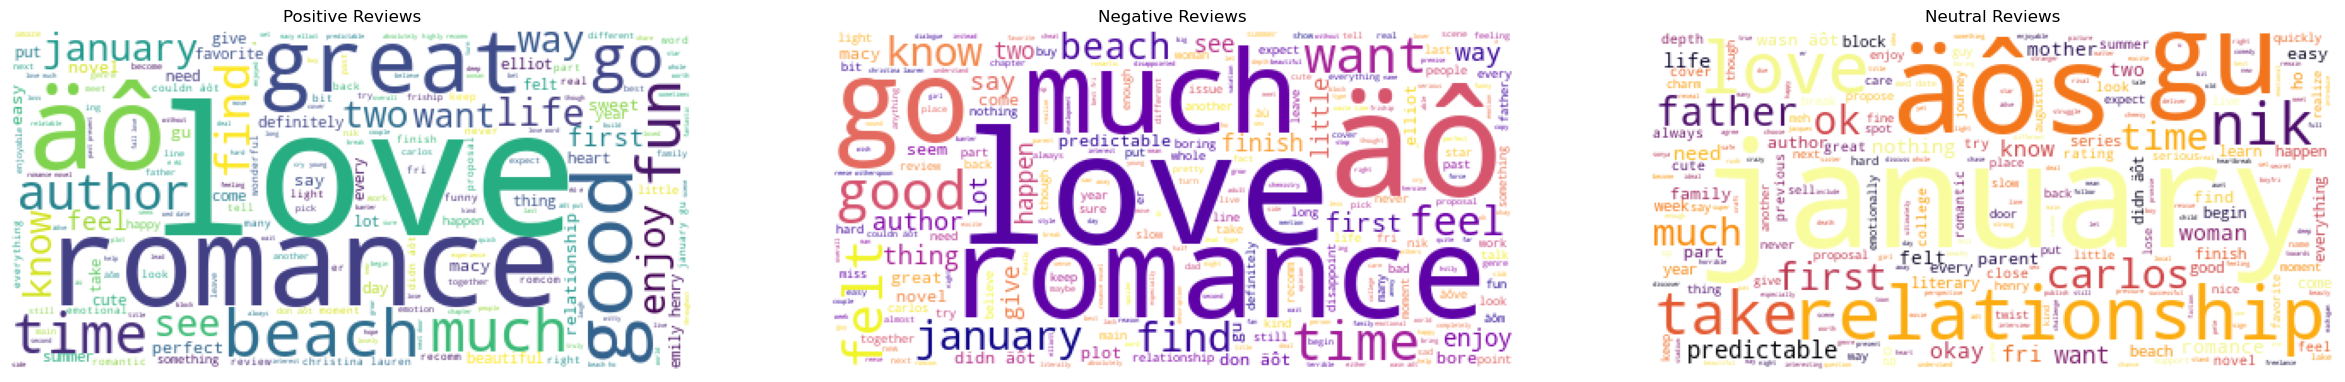

In [40]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==1][train_df_balanced['category']=='romance'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==-1][train_df_balanced['category']=='romance'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==0][train_df_balanced['category']=='romance'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### Product Reviews of All Books

(-0.5, 399.5, 199.5, -0.5)

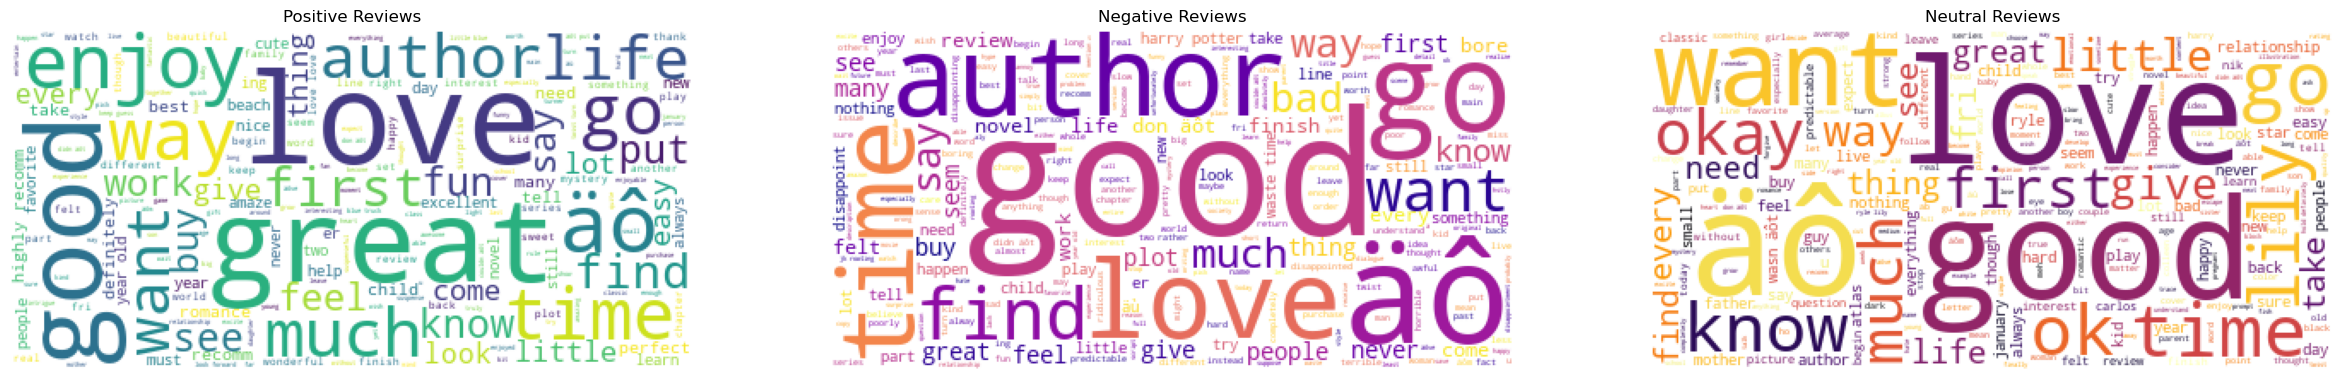

In [41]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==1].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==-1].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(train_df_balanced['concat_review'][train_df_balanced['polarity']==0].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')


